## 1.Problem Definition

Need to work on IMDB data to prepare insights on Titles (movies and TV shows)
To analyse data to bright out the following insights:

1. Which Genre gets the maximum votes?
* Drama, with votes 504932745
2. Which actor - director pair is most successful (in terms of IMDB ratings)?
* director:Rian Johnson,
*  actors: Aaron Paul,Bryan Cranston,Dean Norris
*  title: Ozymandias with a rating of 10.0 and 112607 votes
3. Male leads are most successful in which age bracket?
* (16, 107) if the deathYear is not available it is assumned as present year  and success as top imbd rating
4. For TV shows, what is the avg episode duration of the best TV shows?
* 29.675 minutes
5. Best TV shows last for how many seasons?
	tconst	title	Number of seasons
* 0	tt10233774	Rusty Camel	1
* 1	tt10243828	Live from the 8th Dimension	6
* 2	tt10276912	That's My Chair, That Is	1
* 3	tt10293068	À Brasileira	2
* 4	tt10361854	Tunadas	1
* 5	tt10622458	Words Written Well	5
* 6	tt10758248	FSE Moments (Frustrated Software Engineer Mome...	1
* 7	tt11004858	Blind Wave: Black Sails Reaction	4
* 8	tt11466824	State of Decay	1
* 9	tt1165334	Rendezvous mit Jo	\N
* 10	tt11863100	Boss Hoggin Road Trip Series	1
* 11	tt11869314	Pain: Fibromyalgia Stories	1
* 12	tt2360408	My Brother's Keeper	1
* 13	tt5190996	Caroline the Job Hunter	1
* 14	tt6572396	Bariga Kvitila	1
* 15	tt7131158	Gray Ground	1

6. In which year maximum TV shows ended?
* 2017 with 2863 shows
7.  What factors lead to higher rating

## 2. Data

Link for data:
https://www.imdb.com/interfaces/

**title.tsv / title.akas.tsv.gz - Contains the following information for titles:**

* titleId (string) - a tconst, an alphanumeric unique identifier of the title
* ordering (integer) – a number to uniquely identify rows for a given titleId
* title (string) – the localized title
* region (string) - the region for this version of the title
* language (string) - the language of the title
* types (array) - Enumerated set of attributes for this alternative title. One or more of the following: "alternative", "dvd", "festival", "tv", "video", "working", "original", "imdbDisplay". New values may be added in the future without warning
* attributes (array) - Additional terms to describe this alternative title, not enumerated
* isOriginalTitle (boolean) – 0: not original title; 1: original title

**genres-runtime.tsv / title.basics.tsv.gz - Contains the following information for titles:**
* tconst (string) - alphanumeric unique identifier of the title
* titleType (string) – the type/format of the title (e.g. movie, short, tvseries, tvepisode, video, etc)
* primaryTitle (string) – the more popular title / the title used by the filmmakers on promotional materials at the point of release
* originalTitle (string) - original title, in the original language
* isAdult (boolean) - 0: non-adult title; 1: adult title
* startYear (YYYY) – represents the release year of a title. In the case of TV Series, it is the series start year
* endYear (YYYY) – TV Series end year. ‘\N’ for all other title types
* runtimeMinutes – primary runtime of the title, in minutes
* genres (string array) – includes up to three genres associated with the title

**director.tsv / title.crew.tsv.gz – Contains the director and writer information for all the titles in IMDb. Fields include:**
* tconst (string) - alphanumeric unique identifier of the title
* directors (array of nconsts) - director(s) of the given title
* writers (array of nconsts) – writer(s) of the given title

**episode.tsv / title.episode.tsv.gz – Contains the tv episode information. Fields include:**
* tconst (string) - alphanumeric identifier of episode
* parentTconst (string) - alphanumeric identifier of the parent TV Series
* seasonNumber (integer) – season number the episode belongs to
* episodeNumber (integer) – episode number of the tconst in the TV series

**cast-crew.tsv/ title.principals.tsv.gz – Contains the principal cast/crew for titles**
* tconst (string) - alphanumeric unique identifier of the title
* ordering (integer) – a number to uniquely identify rows for a given titleId
* nconst (string) - alphanumeric unique identifier of the name/person
* category (string) - the category of job that person was in
* job (string) - the specific job title if applicable, else '\N'
* characters (string) - the name of the character played if applicable, else '\N'

**ratings.tsv/ title.ratings.tsv.gz – Contains the IMDb rating and votes information for titles**
* tconst (string) - alphanumeric unique identifier of the title
* averageRating – weighted average of all the individual user ratings
* numVotes - number of votes the title has received

**names.tsv / *name.basics.tsv.gz – Contains the following information for names:**
* nconst (string) - alphanumeric unique identifier of the name/person
* primaryName (string)– name by which the person is most often credited
* birthYear – in YYYY format
* deathYear – in YYYY format if applicable, else '\N'
* primaryProfession (array of strings)– the top-3 professions of the person
* knownForTitles (array of tconsts) – titles the person is known for

## 3. Submisson

* A ppt in pdf format with answers to the questions with reasoning and graphs and explain what methods are used to analyse the data and why
* Maximum 7 slides

* Deadline : 23nd - April - 2020

* Fill up this google form and upload your excel :
https://forms.gle/yow2qT4Bgn3nyF8E6

## 1. Top Genre in terms of votes

In [0]:
import gzip
import pandas as pd
with gzip.open('/content/drive/My Drive/Data/title.tsv.gz') as f:
  title = pd.read_csv(f,sep='\t')
with gzip.open('/content/drive/My Drive/Data/genres.tsv.gz') as f:
  genres = pd.read_csv(f,sep='\t')
with gzip.open('/content/drive/My Drive/Data/ratings.tsv.gz') as f:
  ratings = pd.read_csv(f,sep='\t')


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
genres.loc[genres.endYear != '\\N']

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
34987,tt0035599,tvSeries,Voice of Firestone Televues,Voice of Firestone Televues,0,1943,1947,15,\N
35188,tt0035803,tvSeries,The German Weekly Review,Die Deutsche Wochenschau,0,1940,1945,12,Documentary
37617,tt0038276,tvSeries,You Are an Artist,You Are an Artist,0,1946,1950,15,\N
38451,tt0039120,tvSeries,Americana,Americana,0,1947,1949,30,"Family,Game-Show"
38452,tt0039121,tvSeries,Birthday Party,Birthday Party,0,1947,1949,30,Family
...,...,...,...,...,...,...,...,...,...
6709347,tt9915338,tvSeries,Aunty Donna: Camp Bush Camp!,Aunty Donna: Camp Bush Camp!,0,2018,2018,5,Comedy
6709441,tt9915530,tvSeries,The Land F.A.U.,The Land F.A.U.,0,2019,2019,\N,Crime
6709570,tt9915822,tvSeries,Ichhapyaari Naagin,Ichhapyaari Naagin,0,2016,2017,20,Fantasy
6709752,tt9916216,tvSeries,Kalyanam Mudhal Kadhal Varai,Kalyanam Mudhal Kadhal Varai,0,2014,2017,22,Romance


In [0]:
df = pd.merge(genres,ratings,on='tconst')
df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.6,1600
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",6.0,196
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance",6.5,1275
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short",6.1,121
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short",6.1,2038


Genres column has upto three genre for each title hence after merging genres table with ratings table it is exlpded based on genres column
then the resulting dataframe is grouped by genres with sum to get number of votes for each genre type

In [0]:
df.genres = df.genres.str.split(',')

In [0]:
df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"[Documentary, Short]",5.6,1600
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"[Animation, Short]",6.0,196
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"[Animation, Comedy, Romance]",6.5,1275
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"[Animation, Short]",6.1,121
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"[Comedy, Short]",6.1,2038


In [0]:
len(df)

1024884

In [0]:
df

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"[Documentary, Short]",5.6,1600
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"[Animation, Short]",6.0,196
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"[Animation, Comedy, Romance]",6.5,1275
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"[Animation, Short]",6.1,121
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"[Comedy, Short]",6.1,2038
...,...,...,...,...,...,...,...,...,...,...,...
1024879,tt9916576,tvEpisode,Destinee's Story,Destinee's Story,0,2019,\N,85,[Reality-TV],6.0,9
1024880,tt9916578,tvEpisode,The Trial of Joan Collins,The Trial of Joan Collins,0,2019,\N,\N,"[Adventure, Biography, Comedy]",8.4,17
1024881,tt9916720,short,The Nun 2,The Nun 2,0,2019,\N,10,"[Comedy, Horror, Mystery]",5.5,48
1024882,tt9916766,tvEpisode,Episode #10.15,Episode #10.15,0,2019,\N,43,"[Family, Reality-TV]",6.8,13


In [0]:
df2 = df.explode('genres')

In [0]:
len(df2)

2005513

In [0]:
df2

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,Documentary,5.6,1600
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,Short,5.6,1600
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,Animation,6.0,196
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,Short,6.0,196
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,Animation,6.5,1275
...,...,...,...,...,...,...,...,...,...,...,...
1024881,tt9916720,short,The Nun 2,The Nun 2,0,2019,\N,10,Horror,5.5,48
1024881,tt9916720,short,The Nun 2,The Nun 2,0,2019,\N,10,Mystery,5.5,48
1024882,tt9916766,tvEpisode,Episode #10.15,Episode #10.15,0,2019,\N,43,Family,6.8,13
1024882,tt9916766,tvEpisode,Episode #10.15,Episode #10.15,0,2019,\N,43,Reality-TV,6.8,13


In [0]:
final = df2.groupby(by='genres').sum().sort_values(by='numVotes',ascending=False).reset_index()


In [0]:
final

,genres,isAdult,averageRating,numVotes
0,Drama,1439,2364229.1,504932745
1,Comedy,1568,2246709.8,300147902
2,Action,219,828576.1,295762583
3,Adventure,191,728462.8,249998965
4,Crime,437,742312.5,189050575
5,Thriller,148,261107.6,152475371
6,Romance,1121,509915.6,118551562
7,Sci-Fi,220,194832.1,117579178
8,Mystery,139,336140.3,100081828
9,Fantasy,414,287782.5,94428579


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1024884 entries, 0 to 1024883
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   tconst          1024884 non-null  object 
 1   titleType       1024884 non-null  object 
 2   primaryTitle    1024884 non-null  object 
 3   originalTitle   1024884 non-null  object 
 4   isAdult         1024884 non-null  int64  
 5   startYear       1024884 non-null  object 
 6   endYear         1024884 non-null  object 
 7   runtimeMinutes  1024884 non-null  object 
 8   genres          1024882 non-null  object 
 9   averageRating   1024884 non-null  float64
 10  numVotes        1024884 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 93.8+ MB


In [0]:
import matplotlib.pyplot as plt

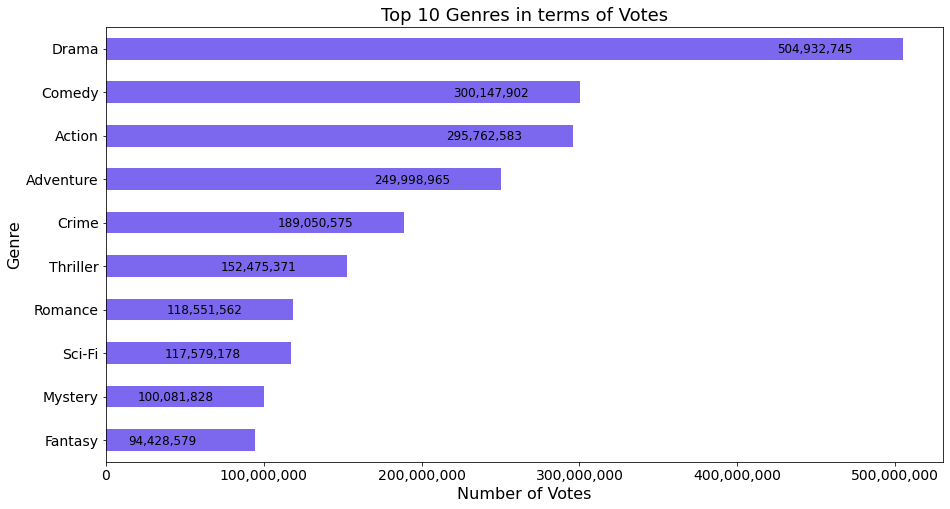

In [0]:
ax = final[:10].plot(x='genres',y='numVotes',kind='barh',figsize=(15,8),legend=None,color="mediumslateblue",fontsize=14)
ax.set_xlabel('Number of Votes',fontsize=16)
ax.set_ylabel('Genre',fontsize=16)
ax.ticklabel_format(axis='x',style='plain')
ax.invert_yaxis()
ax.set_xticklabels(['{:,}'.format(int(x)) for x in ax.get_xticks().tolist()])
ax.set_title('Top 10 Genres in terms of Votes',fontsize=18)

for i in ax.patches:
  width = i.get_width()
  s='{:,}'.format(width)
  ax.annotate(s,xy=(i.get_width()-80000000,i.get_y()+0.1+(i.get_height())/2),color="black",fontsize=12)

## 2. Director-Actor pair based on rating


In [0]:
import gzip
import pandas as pd
with gzip.open('/content/drive/My Drive/Data/crew.tsv.gz') as f:
  crew = pd.read_csv(f,sep='\t')
with gzip.open('/content/drive/My Drive/Data/ratings.tsv.gz') as f:
  ratings = pd.read_csv(f,sep='\t')
with gzip.open('/content/drive/My Drive/Data/name.basics.tsv.gz') as f:
  names = pd.read_csv(f,sep='\t')

In [0]:
crew

,tconst,ordering,nconst,category,job,characters
0,tt0000001,1,nm1588970,self,\N,"[""Self""]"
1,tt0000001,2,nm0005690,director,\N,\N
2,tt0000001,3,nm0374658,cinematographer,director of photography,\N
3,tt0000002,1,nm0721526,director,\N,\N
4,tt0000002,2,nm1335271,composer,\N,\N
...,...,...,...,...,...,...
38728844,tt9916880,5,nm0996406,director,principal director,\N
38728845,tt9916880,6,nm1482639,writer,\N,\N
38728846,tt9916880,7,nm2586970,writer,books,\N
38728847,tt9916880,8,nm1594058,producer,producer,\N


In [0]:
import numpy as np
np.array(crew.category.unique())

array(['self', 'director', 'cinematographer', 'composer', 'producer',
       'editor', 'actor', 'actress', 'writer', 'production_designer',
       'archive_footage', 'archive_sound'], dtype=object)

In [0]:
ratings

,tconst,averageRating,numVotes
0,tt0000001,5.6,1600
1,tt0000002,6.0,196
2,tt0000003,6.5,1275
3,tt0000004,6.1,121
4,tt0000005,6.1,2038
...,...,...,...
1024879,tt9916576,6.0,9
1024880,tt9916578,8.4,17
1024881,tt9916720,5.5,48
1024882,tt9916766,6.8,13


In [0]:
names

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0072308,tt0043044,tt0050419,tt0053137"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0117057,tt0037382,tt0038355,tt0071877"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,producer","tt0059956,tt0049189,tt0054452,tt0057345,tt0054..."
3,nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0078723,tt0080455,tt0072562,tt0077975"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0050976,tt0069467,tt0083922,tt0050986"
...,...,...,...,...,...,...
10012295,nm9993714,Romeo del Rosario,\N,\N,"animation_department,art_department","tt2455546,tt2455546"
10012296,nm9993716,Essias Loberg,\N,\N,NaN,\N
10012297,nm9993717,Harikrishnan Rajan,\N,\N,cinematographer,"tt8736744,tt8736744"
10012298,nm9993718,Aayush Nair,\N,\N,cinematographer,\N


In [0]:
actors = crew.loc[crew.category == 'actor']
directors = crew.loc[crew.category == 'director']

In [0]:
actors

,tconst,ordering,nconst,category,job,characters
11,tt0000005,1,nm0443482,actor,\N,"[""Blacksmith""]"
12,tt0000005,2,nm0653042,actor,\N,"[""Assistant""]"
16,tt0000007,1,nm0179163,actor,\N,\N
17,tt0000007,2,nm0183947,actor,\N,\N
21,tt0000008,1,nm0653028,actor,\N,"[""Sneezing Man""]"
...,...,...,...,...,...,...
38728822,tt9916852,1,nm5519557,actor,\N,"[""Cetin Ertas""]"
38728823,tt9916852,2,nm8825009,actor,\N,"[""Umut""]"
38728833,tt9916856,3,nm10538646,actor,\N,"[""Stephan""]"
38728840,tt9916880,1,nm1483166,actor,\N,"[""Rude Ralph"",""Mischievous Mike"",""Jolly Josh""]"


In [0]:
directors

,tconst,ordering,nconst,category,job,characters
1,tt0000001,2,nm0005690,director,\N,\N
3,tt0000002,1,nm0721526,director,\N,\N
5,tt0000003,1,nm0721526,director,\N,\N
9,tt0000004,1,nm0721526,director,\N,\N
13,tt0000005,3,nm0005690,director,\N,\N
...,...,...,...,...,...,...
38728817,tt9916850,6,nm5519375,director,\N,\N
38728826,tt9916852,5,nm5519454,director,\N,\N
38728827,tt9916852,6,nm5519375,director,\N,\N
38728835,tt9916856,5,nm10538645,director,\N,\N


In [0]:
pairs = pd.merge(directors[['tconst','nconst']],actors[['tconst','nconst']],on='tconst')

In [0]:
pairs

,tconst,nconst_x,nconst_y
0,tt0000005,nm0005690,nm0443482
1,tt0000005,nm0005690,nm0653042
2,tt0000007,nm0005690,nm0179163
3,tt0000007,nm0005690,nm0183947
4,tt0000007,nm0374658,nm0179163
...,...,...,...
7723903,tt9916852,nm5519375,nm5519557
7723904,tt9916852,nm5519375,nm8825009
7723905,tt9916856,nm10538645,nm10538646
7723906,tt9916880,nm0996406,nm1483166


In [0]:
pair_rating = pd.merge(pairs,ratings,on='tconst').sort_values(by='averageRating',ascending=False)
pair_rating

,tconst,nconst_x,nconst_y,averageRating,numVotes
1697307,tt6452096,nm7870411,nm5092260,10.0,9
1682968,tt6255510,nm7870411,nm5092260,10.0,6
1294949,tt2121942,nm1341249,nm4577205,10.0,12
1294950,tt2121942,nm1341249,nm1162129,10.0,12
1294951,tt2121942,nm1341249,nm4530933,10.0,12
...,...,...,...,...,...
1620445,tt5493492,nm6169193,nm7946704,1.0,176
1175421,tt1613600,nm0666362,nm0250616,1.0,6
1175420,tt1613600,nm0666362,nm0191520,1.0,6
1175419,tt1613600,nm0666362,nm0063710,1.0,6


In [0]:
top_pairs = pair_rating.loc[pair_rating.averageRating == 10.0].sort_values(by='numVotes',ascending=False)
top_pairs

,tconst,nconst_x,nconst_y,averageRating,numVotes
1328897,tt2301451,nm0426059,nm0606487,10.0,112607
1328895,tt2301451,nm0426059,nm0186505,10.0,112607
1328896,tt2301451,nm0426059,nm0666739,10.0,112607
966624,tt1069840,nm0035106,nm0805189,10.0,162
966625,tt1069840,nm0035106,nm0492226,10.0,162
...,...,...,...,...,...
1831248,tt8971000,nm1852837,nm0387752,10.0,5
1466093,tt3581396,nm1121943,nm6341141,10.0,5
1466092,tt3581396,nm1121943,nm6341140,10.0,5
1802959,tt8323554,nm5807365,nm2286983,10.0,5


In [0]:
df = pd.merge(top_pairs,names[['nconst','primaryName']],left_on='nconst_x',right_on='nconst')
df1 = pd.merge(df.drop('nconst_x',axis=1),names[['nconst','primaryName']],left_on='nconst_y',right_on='nconst',suffixes=('','_2'))
df1

,tconst,nconst_y,averageRating,numVotes,nconst,primaryName,nconst_2,primaryName_2
0,tt2301451,nm0606487,10.0,112607,nm0426059,Rian Johnson,nm0606487,Dean Norris
1,tt2301451,nm0186505,10.0,112607,nm0426059,Rian Johnson,nm0186505,Bryan Cranston
2,tt2301451,nm0666739,10.0,112607,nm0426059,Rian Johnson,nm0666739,Aaron Paul
3,tt1069840,nm0805189,10.0,162,nm0035106,Allan Arkush,nm0805189,Max Elliott Slade
4,tt1576812,nm0805189,10.0,161,nm0035106,Allan Arkush,nm0805189,Max Elliott Slade
...,...,...,...,...,...,...,...,...
2412,tt4554168,nm5539980,10.0,5,nm5981759,Victor Lockhart,nm5539980,Colin Cunninghame
2413,tt1958076,nm3935246,10.0,5,nm3925995,Wes Sutton,nm3935246,Mike Henderson
2414,tt1958076,nm3837412,10.0,5,nm3925995,Wes Sutton,nm3837412,Jonathan O'Rear
2415,tt1223960,nm0246977,10.0,5,nm2120311,Alex Schmidt,nm0246977,Nils Düwell


In [0]:
pd.DataFrame({'Title_id':df1.tconst,
              'Director_id':df1.nconst,
              "Director":df1.primaryName,
              'Actor_id':df1.nconst_y,
              'Actor':df1.primaryName_2
              })

,Title_id,Director_id,Director,Actor_id,Actor
0,tt2301451,nm0426059,Rian Johnson,nm0606487,Dean Norris
1,tt2301451,nm0426059,Rian Johnson,nm0186505,Bryan Cranston
2,tt2301451,nm0426059,Rian Johnson,nm0666739,Aaron Paul
3,tt1069840,nm0035106,Allan Arkush,nm0805189,Max Elliott Slade
4,tt1576812,nm0035106,Allan Arkush,nm0805189,Max Elliott Slade
...,...,...,...,...,...
2412,tt4554168,nm5981759,Victor Lockhart,nm5539980,Colin Cunninghame
2413,tt1958076,nm3925995,Wes Sutton,nm3935246,Mike Henderson
2414,tt1958076,nm3925995,Wes Sutton,nm3837412,Jonathan O'Rear
2415,tt1223960,nm2120311,Alex Schmidt,nm0246977,Nils Düwell


## 2. Director-Actor pair

In [0]:
import gzip
import pandas as pd
with gzip.open('/content/drive/My Drive/Data/crew.tsv.gz') as f:
  crew = pd.read_csv(f,sep='\t')
with gzip.open('/content/drive/My Drive/Data/ratings.tsv.gz') as f:
  ratings = pd.read_csv(f,sep='\t')
with gzip.open('/content/drive/My Drive/Data/name.basics.tsv.gz') as f:
  names = pd.read_csv(f,sep='\t')

In [0]:
crew.head()

,tconst,ordering,nconst,category,job,characters
0,tt0000001,1,nm1588970,self,\N,"[""Self""]"
1,tt0000001,2,nm0005690,director,\N,\N
2,tt0000001,3,nm0374658,cinematographer,director of photography,\N
3,tt0000002,1,nm0721526,director,\N,\N
4,tt0000002,2,nm1335271,composer,\N,\N


**Each title might have multiple directors and multiple actors**
* A rating of 10.0 is considered the highest rating. Titles with rating 10.0 are first extrated from ratings table and named top_title.

* Form crew table it is found that Each title might have multiple directors and multiple actors.

* Two Tables with only actors,their id and directors,their id for top_titles are  created.

* actors and directors table are merged by inner join and named as pairs

* paris table is merged with names table to get top_pairs table which has names which when sorted by b=number of votes gives

In [0]:
ratings.head()

,tconst,averageRating,numVotes
0,tt0000001,5.6,1600
1,tt0000002,6.0,196
2,tt0000003,6.5,1275
3,tt0000004,6.1,121
4,tt0000005,6.1,2038


In [0]:
names.head()

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0072308,tt0043044,tt0050419,tt0053137"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0117057,tt0037382,tt0038355,tt0071877"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,producer","tt0059956,tt0049189,tt0054452,tt0057345,tt0054..."
3,nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0078723,tt0080455,tt0072562,tt0077975"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0050976,tt0069467,tt0083922,tt0050986"


In [0]:
len(crew),len(ratings),len(names)

(38728849, 1024884, 10012300)

In [0]:
len(crew.tconst.unique()),len(ratings.tconst.unique()),len(names.nconst.unique())

(6071698, 1024884, 10012300)

* There is no unique key for crew table
* tconst is key for ratings table
* nconst is key for names table

In [0]:
# creating a dataframe of top rating titles
top_rating = ratings[ratings['averageRating'] == 10.0].sort_values(by='numVotes',ascending=False)
top_rating.head()

,tconst,averageRating,numVotes
671254,tt2301451,10.0,112607
867391,tt5658362,10.0,199
460174,tt10867894,10.0,175
454487,tt1069840,10.0,162
568217,tt1576808,10.0,161


In [0]:
len(top_rating),len(top_rating.tconst.unique())

(3241, 3241)

In [0]:
pairs = pd.merge(crew[crew.category.isin(['actor','director'])].drop(['job','characters'],axis=1),top_rating,on='tconst')

In [0]:
pairs.sort_values(by='numVotes',ascending=False)

,tconst,ordering,nconst,category,averageRating,numVotes
2208,tt2301451,4,nm0606487,actor,10.0,112607
2209,tt2301451,5,nm0426059,director,10.0,112607
2206,tt2301451,1,nm0186505,actor,10.0,112607
2207,tt2301451,3,nm0666739,actor,10.0,112607
4109,tt5658362,2,nm5047343,director,10.0,199
...,...,...,...,...,...,...
1967,tt2076145,2,nm2311954,actor,10.0,5
1966,tt2076145,1,nm1193100,actor,10.0,5
1937,tt2047551,1,nm0556296,actor,10.0,5
1930,tt2016188,5,nm4573433,director,10.0,5


In [0]:
len(pairs),len(pairs.tconst.unique()),len(pairs.nconst.unique())

(5483, 2424, 2965)

In [0]:
actors = pairs[pairs.category.isin(['actor'])]
director = pairs[pairs.category.isin(['director'])]

In [0]:
actors.head()

,tconst,ordering,nconst,category,averageRating,numVotes
0,tt0050536,2,nm0297293,actor,10.0,6
1,tt0050536,3,nm0917076,actor,10.0,6
3,tt0050536,8,nm2080718,actor,10.0,6
4,tt0050536,9,nm6948643,actor,10.0,6
5,tt0061857,2,nm0182015,actor,10.0,6


In [0]:
director.head()

,tconst,ordering,nconst,category,averageRating,numVotes
2,tt0050536,5,nm0928929,director,10.0,6
6,tt0061857,5,nm0351746,director,10.0,6
15,tt0143594,5,nm3229973,director,10.0,5
17,tt0165902,5,nm0334131,director,10.0,5
18,tt0176240,1,nm0025955,director,10.0,5


In [0]:
len(actors),len(director),len(actors.tconst.unique()),len(director.tconst.unique())

(4118, 1365, 2111, 1132)

In [0]:
df = pd.merge(actors,names,on='nconst')
act_name = pd.DataFrame({'tconst':df.tconst,
                        'actorId':df.nconst,
                        'actorName':df.primaryName,
                         'averageRating':df.averageRating,
                         'votes':df.numVotes})
act_name

,tconst,actorId,actorName,averageRating,votes
0,tt0050536,nm0297293,Joachim Fuchsberger,10.0,6
1,tt0050536,nm0917076,Peter Weck,10.0,6
2,tt0050536,nm2080718,Horst Kreuter,10.0,6
3,tt0050536,nm6948643,Walter Stark,10.0,6
4,tt0061857,nm0182015,Hans Cossy,10.0,6
...,...,...,...,...,...
4109,tt9448190,nm1242398,Kitodar Todorov,10.0,11
4110,tt9448196,nm1242398,Kitodar Todorov,10.0,9
4111,tt9461190,nm4590958,Zayn Alexander,10.0,5
4112,tt9524000,nm10363929,Jason Nawrocki,10.0,7


In [0]:
df = pd.merge(director,names,on='nconst')
dic_name = pd.DataFrame({'tconst':df.tconst,
                        'directorId':df.nconst,
                        'directorName':df.primaryName})
dic_name

,tconst,directorId,directorName
0,tt0050536,nm0928929,Kurt Wilhelm
1,tt0061857,nm0351746,Wilm ten Haaf
2,tt0812403,nm0351746,Wilm ten Haaf
3,tt0143594,nm3229973,Charles Goodwin
4,tt0165902,nm0334131,John Graham
...,...,...,...
1360,tt9165892,nm5389223,Pavel Vazquez
1361,tt9179308,nm0809332,Micah Smith
1362,tt9206890,nm9437750,Bernardo Covarrubias Villarreal
1363,tt9257804,nm9614025,Onur Erdurak


In [0]:
top_pair = pd.merge(dic_name,act_name,on='tconst')
top_pair

,tconst,directorId,directorName,actorId,actorName,averageRating,votes
0,tt0050536,nm0928929,Kurt Wilhelm,nm0297293,Joachim Fuchsberger,10.0,6
1,tt0050536,nm0928929,Kurt Wilhelm,nm0917076,Peter Weck,10.0,6
2,tt0050536,nm0928929,Kurt Wilhelm,nm2080718,Horst Kreuter,10.0,6
3,tt0050536,nm0928929,Kurt Wilhelm,nm6948643,Walter Stark,10.0,6
4,tt0061857,nm0351746,Wilm ten Haaf,nm0182015,Hans Cossy,10.0,6
...,...,...,...,...,...,...,...
2412,tt9206890,nm9437750,Bernardo Covarrubias Villarreal,nm9827202,Sebastian Ortiz Wilkins,10.0,7
2413,tt9257804,nm9614025,Onur Erdurak,nm10249432,Vid Cerjak,10.0,5
2414,tt9257804,nm9614025,Onur Erdurak,nm10249435,Bedri Erdurak,10.0,5
2415,tt9257804,nm9614025,Onur Erdurak,nm1727208,Kemal Erdurak,10.0,5


In [0]:
top_pair.sort_values(by='votes',ascending=False)

,tconst,directorId,directorName,actorId,actorName,averageRating,votes
1033,tt2301451,nm0426059,Rian Johnson,nm0666739,Aaron Paul,10.0,112607
1034,tt2301451,nm0426059,Rian Johnson,nm0606487,Dean Norris,10.0,112607
1032,tt2301451,nm0426059,Rian Johnson,nm0186505,Bryan Cranston,10.0,112607
408,tt1069840,nm0035106,Allan Arkush,nm0492226,Zachary La Voy,10.0,162
406,tt1069840,nm0035106,Allan Arkush,nm0000893,Ed Begley Jr.,10.0,162
...,...,...,...,...,...,...,...
1062,tt2399912,nm4698955,Tim Ellrich,nm5276592,Jozo Rados,10.0,5
1061,tt2399912,nm4698955,Tim Ellrich,nm5277044,Lindor Isenaj,10.0,5
1060,tt2399912,nm4698955,Tim Ellrich,nm7937198,Thomas Erlmoser,10.0,5
1059,tt2395754,nm5315067,Frances Hughes,nm5501565,Presley Cole Carlson,10.0,5


In [0]:
with gzip.open('/content/drive/My Drive/Data/title.tsv.gz') as f:
  title = pd.read_csv(f,sep='\t')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
title[title.titleId == 'tt2301451']

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
10471945,tt2301451,1,Ozymandias,\N,\N,original,\N,1
10471946,tt2301451,2,Ozymandias,US,\N,imdbDisplay,\N,0


## Age of successful male lead roles

In [0]:
import gzip
import pandas as pd
with gzip.open('/content/drive/My Drive/Data/crew.tsv.gz') as f:
  crew = pd.read_csv(f,sep='\t')
with gzip.open('/content/drive/My Drive/Data/ratings.tsv.gz') as f:
  ratings = pd.read_csv(f,sep='\t')
with gzip.open('/content/drive/My Drive/Data/name.basics.tsv.gz') as f:
  names = pd.read_csv(f,sep='\t')

In [0]:
# creating a dataframe of top rating titles
top_rating = ratings[ratings['averageRating'] == 10.0].sort_values(by='numVotes',ascending=False)
top_rating.head()

,tconst,averageRating,numVotes
671254,tt2301451,10.0,112607
867391,tt5658362,10.0,199
460174,tt10867894,10.0,175
454487,tt1069840,10.0,162
568217,tt1576808,10.0,161


In [0]:
top_rating

,tconst,averageRating,numVotes
671254,tt2301451,10.0,112607
867391,tt5658362,10.0,199
460174,tt10867894,10.0,175
454487,tt1069840,10.0,162
568217,tt1576808,10.0,161
...,...,...,...
818979,tt4720314,10.0,5
818978,tt4720312,10.0,5
818977,tt4720310,10.0,5
818975,tt4720302,10.0,5


In [0]:
len(ratings.loc[ratings.averageRating == 10.0])

3241

In [0]:
top_actor = pd.merge(crew[crew.category.isin(['actor'])].drop(['job','characters'],axis=1),top_rating,on='tconst')

In [0]:
top_actor

,tconst,ordering,nconst,category,averageRating,numVotes
0,tt0050536,2,nm0297293,actor,10.0,6
1,tt0050536,3,nm0917076,actor,10.0,6
2,tt0050536,8,nm2080718,actor,10.0,6
3,tt0050536,9,nm6948643,actor,10.0,6
4,tt0061857,2,nm0182015,actor,10.0,6
...,...,...,...,...,...,...
4113,tt9448190,1,nm1242398,actor,10.0,11
4114,tt9448196,1,nm1242398,actor,10.0,9
4115,tt9461190,1,nm4590958,actor,10.0,5
4116,tt9524000,4,nm10363929,actor,10.0,7


In [0]:
len(top_actor),len(top_actor.nconst),len(top_actor.tconst.unique()),len(top_actor.nconst.unique())

(4118, 4118, 2111, 2166)

In [0]:
top_actor.sort_values(by='nconst')

,tconst,ordering,nconst,category,averageRating,numVotes
1298,tt1576810,10,nm0000274,actor,10.0,161
1308,tt1576814,10,nm0000274,actor,10.0,161
1458,tt1994734,8,nm0000317,actor,10.0,5
132,tt0659278,10,nm0000489,actor,10.0,6
148,tt0726124,1,nm0000792,actor,10.0,5
...,...,...,...,...,...,...
4043,tt8594682,4,nm9924252,actor,10.0,6
4044,tt8594682,5,nm9924253,actor,10.0,6
195,tt0834174,3,nm9949524,actor,10.0,5
448,tt10529798,1,nm9955575,actor,10.0,10


In [0]:
# titles and actors are not unique, make nconst column unique
top_actor = top_actor.drop_duplicates(subset='nconst')
top_actor

,tconst,ordering,nconst,category,averageRating,numVotes
0,tt0050536,2,nm0297293,actor,10.0,6
1,tt0050536,3,nm0917076,actor,10.0,6
2,tt0050536,8,nm2080718,actor,10.0,6
3,tt0050536,9,nm6948643,actor,10.0,6
4,tt0061857,2,nm0182015,actor,10.0,6
...,...,...,...,...,...,...
4110,tt9257804,3,nm1727208,actor,10.0,5
4111,tt9448172,1,nm1242398,actor,10.0,11
4115,tt9461190,1,nm4590958,actor,10.0,5
4116,tt9524000,4,nm10363929,actor,10.0,7


In [0]:
#merging with names table which has birth and death year
df = pd.merge(top_actor,names,on='nconst').sort_values(by='numVotes',ascending=False)
df

,tconst,ordering,nconst,category,averageRating,numVotes,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
1026,tt2301451,3,nm0666739,actor,10.0,112607,Aaron Paul,1979,\N,"actor,producer,soundtrack","tt0903747,tt0844708,tt2369135,tt9243946,tt0844..."
1027,tt2301451,4,nm0606487,actor,10.0,112607,Dean Norris,1963,\N,"actor,soundtrack,producer","tt1567609,tt1553656,tt0100802,tt0903747"
1025,tt2301451,1,nm0186505,actor,10.0,112607,Bryan Cranston,1956,\N,"actor,producer,director","tt0903747,tt1024648,tt3203606,tt0212671"
419,tt1069840,3,nm0805189,actor,10.0,162,Max Elliott Slade,1980,\N,actor,"tt0109015,tt0103596,tt0098067,tt0112384"
418,tt1069840,1,nm0000893,actor,10.0,162,Ed Begley Jr.,1949,\N,"actor,producer,director","tt0310281,tt0910936,tt1178663,tt1289401"
...,...,...,...,...,...,...,...,...,...,...,...
956,tt2148877,1,nm4734262,actor,10.0,5,B.K-McKee,\N,\N,"actor,set_decorator,miscellaneous","tt2258130,tt2449810,tt2518370,tt2413816"
955,tt2144164,3,nm5032893,actor,10.0,5,Ben McMath,\N,\N,actor,"tt2384975,tt2384975,tt2144164,tt2144164"
954,tt2144164,2,nm2956456,actor,10.0,5,David Haydn,\N,\N,actor,"tt1913178,tt5338744,tt2048905,tt2048905,tt5338..."
946,tt2113096,6,nm1459548,actor,10.0,5,Tom Moore,1972,\N,"actor,director,writer","tt1706508,tt9181908,tt9181908,tt3357640,tt1081..."


In [0]:
len(df.loc[df.deathYear != '\\N'])

125

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2162 entries, 1026 to 2161
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tconst             2162 non-null   object 
 1   ordering           2162 non-null   int64  
 2   nconst             2162 non-null   object 
 3   category           2162 non-null   object 
 4   averageRating      2162 non-null   float64
 5   numVotes           2162 non-null   int64  
 6   primaryName        2162 non-null   object 
 7   birthYear          2162 non-null   object 
 8   deathYear          2162 non-null   object 
 9   primaryProfession  2110 non-null   object 
 10  knownForTitles     2162 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 202.7+ KB


In [0]:
df = df[df.birthYear != '\\N']
df

,tconst,ordering,nconst,category,averageRating,numVotes,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
1026,tt2301451,3,nm0666739,actor,10.0,112607,Aaron Paul,1979,\N,"actor,producer,soundtrack","tt0903747,tt0844708,tt2369135,tt9243946,tt0844..."
1027,tt2301451,4,nm0606487,actor,10.0,112607,Dean Norris,1963,\N,"actor,soundtrack,producer","tt1567609,tt1553656,tt0100802,tt0903747"
1025,tt2301451,1,nm0186505,actor,10.0,112607,Bryan Cranston,1956,\N,"actor,producer,director","tt0903747,tt1024648,tt3203606,tt0212671"
419,tt1069840,3,nm0805189,actor,10.0,162,Max Elliott Slade,1980,\N,actor,"tt0109015,tt0103596,tt0098067,tt0112384"
418,tt1069840,1,nm0000893,actor,10.0,162,Ed Begley Jr.,1949,\N,"actor,producer,director","tt0310281,tt0910936,tt1178663,tt1289401"
...,...,...,...,...,...,...,...,...,...,...,...
932,tt2087670,1,nm0854584,actor,10.0,5,Petar Temelkovski,1946,\N,actor,"tt0179196,tt0110423,tt0083306,tt0179196,tt0110..."
929,tt2076145,4,nm2792891,actor,10.0,5,David Yuzuk,1968,\N,"actor,producer,writer","tt1552112,tt6547170,tt7291412"
928,tt2076145,2,nm2311954,actor,10.0,5,Robert Gordon Spencer,1969,\N,"actor,producer,writer","tt1653083,tt6397524,tt1189041,tt6397818"
962,tt2156462,2,nm1066970,actor,10.0,5,Rico E. Anderson,1968,\N,"actor,producer,miscellaneous","tt6111130,tt7587890,tt5691552,tt7821582"


In [0]:
# setting death year to 2020 
df.loc[df.deathYear == '\\N','deathYear'] = 2020

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [0]:
df

,tconst,ordering,nconst,category,averageRating,numVotes,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
1026,tt2301451,3,nm0666739,actor,10.0,112607,Aaron Paul,1979,2020,"actor,producer,soundtrack","tt0903747,tt0844708,tt2369135,tt9243946,tt0844..."
1027,tt2301451,4,nm0606487,actor,10.0,112607,Dean Norris,1963,2020,"actor,soundtrack,producer","tt1567609,tt1553656,tt0100802,tt0903747"
1025,tt2301451,1,nm0186505,actor,10.0,112607,Bryan Cranston,1956,2020,"actor,producer,director","tt0903747,tt1024648,tt3203606,tt0212671"
419,tt1069840,3,nm0805189,actor,10.0,162,Max Elliott Slade,1980,2020,actor,"tt0109015,tt0103596,tt0098067,tt0112384"
418,tt1069840,1,nm0000893,actor,10.0,162,Ed Begley Jr.,1949,2020,"actor,producer,director","tt0310281,tt0910936,tt1178663,tt1289401"
...,...,...,...,...,...,...,...,...,...,...,...
932,tt2087670,1,nm0854584,actor,10.0,5,Petar Temelkovski,1946,2020,actor,"tt0179196,tt0110423,tt0083306,tt0179196,tt0110..."
929,tt2076145,4,nm2792891,actor,10.0,5,David Yuzuk,1968,2020,"actor,producer,writer","tt1552112,tt6547170,tt7291412"
928,tt2076145,2,nm2311954,actor,10.0,5,Robert Gordon Spencer,1969,2020,"actor,producer,writer","tt1653083,tt6397524,tt1189041,tt6397818"
962,tt2156462,2,nm1066970,actor,10.0,5,Rico E. Anderson,1968,2020,"actor,producer,miscellaneous","tt6111130,tt7587890,tt5691552,tt7821582"


In [0]:
len(df.loc[df.deathYear == '2020']),len(df.loc[df.deathYear == '\\N']),len(df.loc[df.deathYear != '\\N'])

(408, 0, 530)

In [0]:
df

,tconst,ordering,nconst,category,averageRating,numVotes,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
1026,tt2301451,3,nm0666739,actor,10.0,112607,Aaron Paul,1979,2020,"actor,producer,soundtrack","tt0903747,tt0844708,tt2369135,tt9243946,tt0844..."
1027,tt2301451,4,nm0606487,actor,10.0,112607,Dean Norris,1963,2020,"actor,soundtrack,producer","tt1567609,tt1553656,tt0100802,tt0903747"
1025,tt2301451,1,nm0186505,actor,10.0,112607,Bryan Cranston,1956,2020,"actor,producer,director","tt0903747,tt1024648,tt3203606,tt0212671"
419,tt1069840,3,nm0805189,actor,10.0,162,Max Elliott Slade,1980,2020,actor,"tt0109015,tt0103596,tt0098067,tt0112384"
418,tt1069840,1,nm0000893,actor,10.0,162,Ed Begley Jr.,1949,2020,"actor,producer,director","tt0310281,tt0910936,tt1178663,tt1289401"
...,...,...,...,...,...,...,...,...,...,...,...
932,tt2087670,1,nm0854584,actor,10.0,5,Petar Temelkovski,1946,2020,actor,"tt0179196,tt0110423,tt0083306,tt0179196,tt0110..."
929,tt2076145,4,nm2792891,actor,10.0,5,David Yuzuk,1968,2020,"actor,producer,writer","tt1552112,tt6547170,tt7291412"
928,tt2076145,2,nm2311954,actor,10.0,5,Robert Gordon Spencer,1969,2020,"actor,producer,writer","tt1653083,tt6397524,tt1189041,tt6397818"
962,tt2156462,2,nm1066970,actor,10.0,5,Rico E. Anderson,1968,2020,"actor,producer,miscellaneous","tt6111130,tt7587890,tt5691552,tt7821582"


In [0]:
df.birthYear = df.birthYear.astype(int)
df.deathYear = df.deathYear.astype(int)
df[:10]

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,tconst,ordering,nconst,category,averageRating,numVotes,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
1026,tt2301451,3,nm0666739,actor,10.0,112607,Aaron Paul,1979,2020,"actor,producer,soundtrack","tt0903747,tt0844708,tt2369135,tt9243946,tt0844..."
1027,tt2301451,4,nm0606487,actor,10.0,112607,Dean Norris,1963,2020,"actor,soundtrack,producer","tt1567609,tt1553656,tt0100802,tt0903747"
1025,tt2301451,1,nm0186505,actor,10.0,112607,Bryan Cranston,1956,2020,"actor,producer,director","tt0903747,tt1024648,tt3203606,tt0212671"
419,tt1069840,3,nm0805189,actor,10.0,162,Max Elliott Slade,1980,2020,actor,"tt0109015,tt0103596,tt0098067,tt0112384"
418,tt1069840,1,nm0000893,actor,10.0,162,Ed Begley Jr.,1949,2020,"actor,producer,director","tt0310281,tt0910936,tt1178663,tt1289401"
420,tt1069840,8,nm0492226,actor,10.0,162,Zachary La Voy,1986,2020,"actor,writer","tt3587736,tt0098887,tt2262221,tt0098067"
925,tt2061693,4,nm0233079,actor,10.0,161,Ryan Donowho,1980,2020,"actor,producer,soundtrack","tt0412019,tt1457764,tt0475268,tt0373024,tt1457..."
791,tt1576810,10,nm0000274,actor,10.0,161,David Arquette,1971,2020,"producer,actor,director","tt0151738,tt0120082,tt0271367,tt0134084"
354,tt10471404,2,nm0005000,actor,10.0,87,Tony Hawk,1968,2020,"actor,producer,stunts","tt0295701,tt0355702,tt1528854,tt1528854,tt0355..."
557,tt11281576,1,nm11128343,actor,10.0,66,Hazar Deniz BG,1998,2020,"director,editor,writer","tt11281950,tt11437496,tt11437496,tt11281950,tt..."


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 530 entries, 1026 to 946
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tconst             530 non-null    object 
 1   ordering           530 non-null    int64  
 2   nconst             530 non-null    object 
 3   category           530 non-null    object 
 4   averageRating      530 non-null    float64
 5   numVotes           530 non-null    int64  
 6   primaryName        530 non-null    object 
 7   birthYear          530 non-null    int64  
 8   deathYear          530 non-null    int64  
 9   primaryProfession  529 non-null    object 
 10  knownForTitles     530 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 49.7+ KB


In [0]:
age_df = (pd.DataFrame({'numVotes':df.numVotes,
                       'actor':df.primaryName,
                       'age':(df.deathYear - df.birthYear)})).reset_index(drop=True)
age_df[:10]

,numVotes,actor,age
0,112607,Aaron Paul,41
1,112607,Dean Norris,57
2,112607,Bryan Cranston,64
3,162,Max Elliott Slade,40
4,162,Ed Begley Jr.,71
5,162,Zachary La Voy,34
6,161,Ryan Donowho,40
7,161,David Arquette,49
8,87,Tony Hawk,52
9,66,Hazar Deniz BG,22


In [0]:
import matplotlib.pyplot as plt

[]

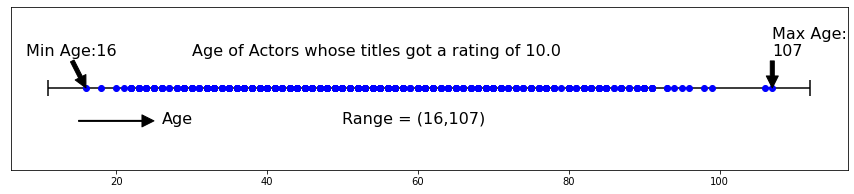

In [0]:
fig, ax = plt.subplots(figsize=(15,3))
ax.set_xlim(age_df.age.min()-10,age_df.age.max()+10)
ax.set_ylim(0,10)

# draw lines
xmin = age_df.age.min()-5
xmax = age_df.age.max()+5
y = 5
height = 1

ax.hlines(y, xmin, xmax)
ax.vlines(xmin, y - height / 2., y + height / 2.)
ax.vlines(xmax, y - height / 2., y + height / 2.)
ax.plot(age_df.age,[5]*len(age_df),'bo')
ax.annotate('Min Age:'+str(age_df.age.min()),xy=(age_df.age.min(),5),
            xytext=(age_df.age.min()-8,7),
            arrowprops=dict(facecolor='black', shrink=0.01),fontsize=16)
ax.annotate('Max Age:\n'+str(age_df.age.max()),xy=(age_df.age.max(),5),
            xytext=(age_df.age.max(),7),
            arrowprops=dict(facecolor='black', shrink=0.01),fontsize=16)
ax.text(30,7,'Age of Actors whose titles got a rating of 10.0',fontsize=16)
ax.text(26,2.85,'Age',fontsize=16)
ax.text(50,2.85,'Range = (16,107)',fontsize=16)
ax.annotate('',xy=(25,3),
            xytext=(15,3),
            arrowprops=dict(facecolor='black', width=1),fontsize=16)
ax.set_yticklabels([])
ax.set_yticks([])


In [0]:
import matplotlib.pyplot as plt

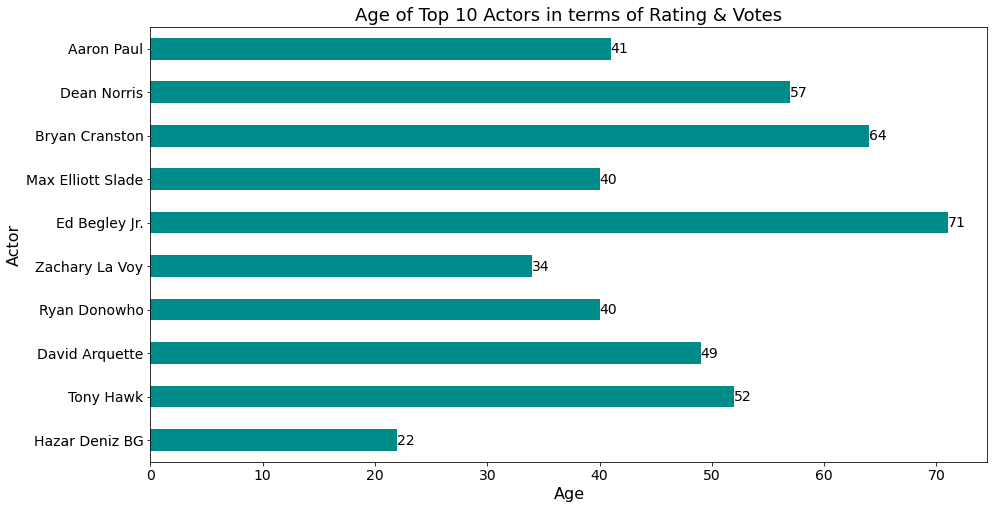

In [0]:
ax = age_df[:10].plot(x='actor',y='age',kind='barh',figsize=(15,8),legend=None,color="darkcyan",fontsize=14)
ax.set_xlabel('Age',fontsize=16)
ax.set_ylabel('Actor',fontsize=16)

ax.invert_yaxis()

ax.set_title('Age of Top 10 Actors in terms of Rating & Votes',fontsize=18)
for i, rows in age_df[:10].iterrows():
  plt.annotate(rows["age"], xy=(rows["age"],i+0.1), rotation=0,fontsize=14, color="black")

In [0]:
age_df.age.min(),age_df.age.max()

(16, 107)

In [0]:
age_df.loc[age_df.age == 16]

,numVotes,actor,age
162,7,Freddie Beddington,16


## Avg episode duration of the best TV shows

In [0]:
import gzip
import pandas as pd
with gzip.open('/content/drive/My Drive/Data/genres.tsv.gz') as f:
  genres = pd.read_csv(f,sep='\t')
with gzip.open('/content/drive/My Drive/Data/ratings.tsv.gz') as f:
  ratings = pd.read_csv(f,sep='\t')
with gzip.open('/content/drive/My Drive/Data/episode.tsv.gz') as f:
  episodes = pd.read_csv(f,sep='\t')


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


* Best is defined by rating, which is equal to 10.0
* From genre table titles with tvSeries titletype are extracted and named as tv_shows, which is merged with ratings table whose rating is 10.0 to get top_shows table
* From top_shows table we get following

In [0]:
genres

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"
...,...,...,...,...,...,...,...,...,...
6710056,tt9916848,tvEpisode,Episode #3.17,Episode #3.17,0,2010,\N,\N,"Action,Drama,Family"
6710057,tt9916850,tvEpisode,Episode #3.19,Episode #3.19,0,2010,\N,\N,"Action,Drama,Family"
6710058,tt9916852,tvEpisode,Episode #3.20,Episode #3.20,0,2010,\N,\N,"Action,Drama,Family"
6710059,tt9916856,short,The Wind,The Wind,0,2015,\N,27,Short


In [0]:
tv_shows = genres.loc[genres.titleType == 'tvSeries']
tv_shows

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
34987,tt0035599,tvSeries,Voice of Firestone Televues,Voice of Firestone Televues,0,1943,1947,15,\N
35188,tt0035803,tvSeries,The German Weekly Review,Die Deutsche Wochenschau,0,1940,1945,12,Documentary
37617,tt0038276,tvSeries,You Are an Artist,You Are an Artist,0,1946,1950,15,\N
38451,tt0039120,tvSeries,Americana,Americana,0,1947,1949,30,"Family,Game-Show"
38452,tt0039121,tvSeries,Birthday Party,Birthday Party,0,1947,1949,30,Family
...,...,...,...,...,...,...,...,...,...
6709749,tt9916210,tvSeries,Rumpole of the Bailey,Rumpole of the Bailey,0,\N,\N,\N,\N
6709752,tt9916216,tvSeries,Kalyanam Mudhal Kadhal Varai,Kalyanam Mudhal Kadhal Varai,0,2014,2017,22,Romance
6709753,tt9916218,tvSeries,Lost in Food,Lost in Food,0,2016,2017,\N,Talk-Show
6709833,tt9916380,tvSeries,Meie aasta Aafrikas,Meie aasta Aafrikas,0,2019,\N,43,"Adventure,Comedy,Family"


In [0]:
# creating a dataframe of top rating titles
top_rating = ratings[ratings['averageRating'] == 10.0].sort_values(by='numVotes',ascending=False)
top_rating.head()

,tconst,averageRating,numVotes
671254,tt2301451,10.0,112607
867391,tt5658362,10.0,199
460174,tt10867894,10.0,175
454487,tt1069840,10.0,162
568217,tt1576808,10.0,161


In [0]:
top_tv = pd.merge(tv_shows,top_rating,on='tconst')
top_tv

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt10233774,tvSeries,Rusty Camel,Rusty Camel,0,2020,\N,\N,Comedy,10.0,9
1,tt10243828,tvSeries,Live from the 8th Dimension,Live from the 8th Dimension,0,2019,\N,\N,Comedy,10.0,5
2,tt10293068,tvSeries,À Brasileira,À Brasileira,0,2019,\N,25,Documentary,10.0,9
3,tt10361854,tvSeries,Tunadas,Tunadas,0,2019,\N,\N,Documentary,10.0,9
4,tt10462950,tvSeries,"Ommi Traki, nas mlah","Ommi Traki, nas mlah",0,1969,1971,\N,Comedy,10.0,5
5,tt10622458,tvSeries,Words Written Well,Words Written Well,0,2019,\N,15,Short,10.0,5
6,tt11004858,tvSeries,Blind Wave: Black Sails Reaction,Blind Wave: Black Sails Reaction,0,2018,2018,30,Talk-Show,10.0,6
7,tt11006412,tvSeries,Surajya Sanhita,Surajya Sanhita,0,2019,2019,\N,History,10.0,8
8,tt11051072,tvSeries,El Harba,El Harba,0,2019,2019,\N,Comedy,10.0,8
9,tt1165334,tvSeries,Rendezvous mit Jo,Rendezvous mit Jo,0,1963,1965,60,"Music,Talk-Show",10.0,5


In [0]:
df = top_tv.loc[top_tv.runtimeMinutes != '\\N'].reset_index()
df.runtimeMinutes = pd.to_numeric(df.runtimeMinutes)
df

,index,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,2,tt10293068,tvSeries,À Brasileira,À Brasileira,0,2019,\N,25,Documentary,10.0,9
1,5,tt10622458,tvSeries,Words Written Well,Words Written Well,0,2019,\N,15,Short,10.0,5
2,6,tt11004858,tvSeries,Blind Wave: Black Sails Reaction,Blind Wave: Black Sails Reaction,0,2018,2018,30,Talk-Show,10.0,6
3,9,tt1165334,tvSeries,Rendezvous mit Jo,Rendezvous mit Jo,0,1963,1965,60,"Music,Talk-Show",10.0,5
4,11,tt5190996,tvSeries,Caroline the Job Hunter,Caroline the Job Hunter,0,2016,\N,13,Comedy,10.0,5


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 2 to 11
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tconst          5 non-null      object 
 1   titleType       5 non-null      object 
 2   primaryTitle    5 non-null      object 
 3   originalTitle   5 non-null      object 
 4   isAdult         5 non-null      int64  
 5   startYear       5 non-null      object 
 6   endYear         5 non-null      object 
 7   runtimeMinutes  5 non-null      int64  
 8   genres          5 non-null      object 
 9   averageRating   5 non-null      float64
 10  numVotes        5 non-null      int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 480.0+ bytes


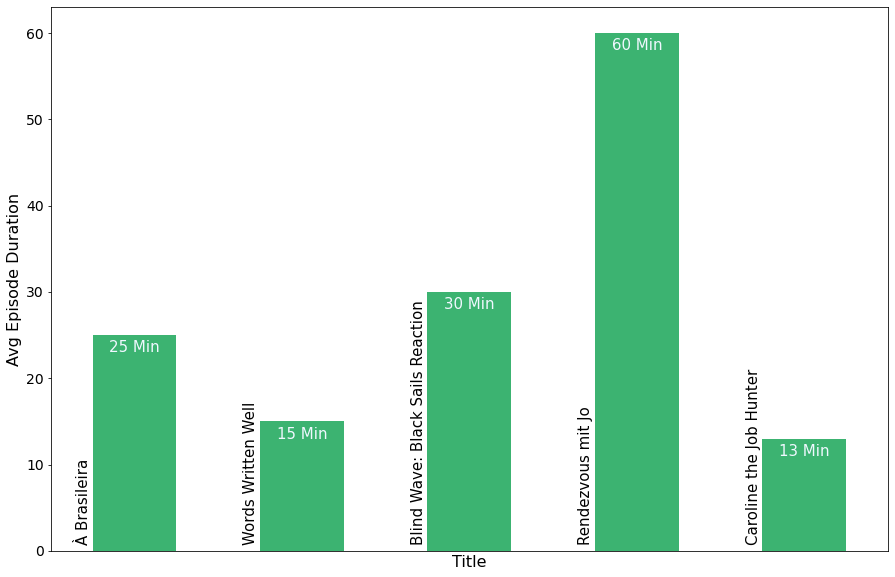

In [0]:
ax = df.plot(x='originalTitle',y='runtimeMinutes',
             figsize=(15,10),kind='bar',color='mediumseagreen',legend=False,fontsize=14)
ax.tick_params(labelbottom=False,bottom=False)
ax.set_xlabel('Title',fontsize=16)
ax.set_ylabel('Avg Episode Duration',fontsize=16)
ind = 0
for i in ax.patches:
  height = i.get_height()
  ax.annotate(s = str(height) + ' Min',xy=(i.get_x()+0.1,height-2),fontsize=15,color='aliceblue')
  ax.annotate(s = df.originalTitle[ind],xy=(i.get_x()-0.1,1),fontsize=15,rotation=90)
  ind = ind+1

In [0]:
episodes

,tconst,parentTconst,seasonNumber,episodeNumber
0,tt0041951,tt0041038,1,9
1,tt0042816,tt0989125,1,17
2,tt0042889,tt0989125,\N,\N
3,tt0043426,tt0040051,3,42
4,tt0043631,tt0989125,2,16
...,...,...,...,...
4768792,tt9916846,tt1289683,3,18
4768793,tt9916848,tt1289683,3,17
4768794,tt9916850,tt1289683,3,19
4768795,tt9916852,tt1289683,3,20


In [0]:
top_episodes = pd.merge(top_tv,episodes,left_on='tconst',right_on='parentTconst')
top_episodes

,tconst_x,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,tconst_y,parentTconst,seasonNumber,episodeNumber
0,tt10233774,tvSeries,Rusty Camel,Rusty Camel,0,2020,\N,\N,Comedy,10.0,9,tt10492486,tt10233774,1,1
1,tt10233774,tvSeries,Rusty Camel,Rusty Camel,0,2020,\N,\N,Comedy,10.0,9,tt10492490,tt10233774,1,2
2,tt10233774,tvSeries,Rusty Camel,Rusty Camel,0,2020,\N,\N,Comedy,10.0,9,tt10492492,tt10233774,1,3
3,tt10233774,tvSeries,Rusty Camel,Rusty Camel,0,2020,\N,\N,Comedy,10.0,9,tt10492496,tt10233774,1,4
4,tt10233774,tvSeries,Rusty Camel,Rusty Camel,0,2020,\N,\N,Comedy,10.0,9,tt10492498,tt10233774,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,tt5190996,tvSeries,Caroline the Job Hunter,Caroline the Job Hunter,0,2016,\N,13,Comedy,10.0,5,tt5228646,tt5190996,1,4
138,tt5190996,tvSeries,Caroline the Job Hunter,Caroline the Job Hunter,0,2016,\N,13,Comedy,10.0,5,tt5228652,tt5190996,1,5
139,tt5190996,tvSeries,Caroline the Job Hunter,Caroline the Job Hunter,0,2016,\N,13,Comedy,10.0,5,tt5228660,tt5190996,1,6
140,tt5190996,tvSeries,Caroline the Job Hunter,Caroline the Job Hunter,0,2016,\N,13,Comedy,10.0,5,tt5228670,tt5190996,1,7


In [0]:
len(top_episodes.loc[top_episodes.runtimeMinutes != '\\N'])

80

In [0]:
top_episodes = top_episodes.loc[top_episodes.runtimeMinutes != '\\N']
top_episodes

,tconst_x,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,tconst_y,parentTconst,seasonNumber,episodeNumber
46,tt10293068,tvSeries,À Brasileira,À Brasileira,0,2019,\N,25,Documentary,10.0,9,tt10303142,tt10293068,1,1
47,tt10293068,tvSeries,À Brasileira,À Brasileira,0,2019,\N,25,Documentary,10.0,9,tt10303336,tt10293068,1,2
48,tt10293068,tvSeries,À Brasileira,À Brasileira,0,2019,\N,25,Documentary,10.0,9,tt10303338,tt10293068,1,3
49,tt10293068,tvSeries,À Brasileira,À Brasileira,0,2019,\N,25,Documentary,10.0,9,tt10303340,tt10293068,1,4
50,tt10293068,tvSeries,À Brasileira,À Brasileira,0,2019,\N,25,Documentary,10.0,9,tt10303344,tt10293068,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,tt5190996,tvSeries,Caroline the Job Hunter,Caroline the Job Hunter,0,2016,\N,13,Comedy,10.0,5,tt5228646,tt5190996,1,4
138,tt5190996,tvSeries,Caroline the Job Hunter,Caroline the Job Hunter,0,2016,\N,13,Comedy,10.0,5,tt5228652,tt5190996,1,5
139,tt5190996,tvSeries,Caroline the Job Hunter,Caroline the Job Hunter,0,2016,\N,13,Comedy,10.0,5,tt5228660,tt5190996,1,6
140,tt5190996,tvSeries,Caroline the Job Hunter,Caroline the Job Hunter,0,2016,\N,13,Comedy,10.0,5,tt5228670,tt5190996,1,7


In [0]:
top_episodes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80 entries, 46 to 141
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tconst_x        80 non-null     object 
 1   titleType       80 non-null     object 
 2   primaryTitle    80 non-null     object 
 3   originalTitle   80 non-null     object 
 4   isAdult         80 non-null     int64  
 5   startYear       80 non-null     object 
 6   endYear         80 non-null     object 
 7   runtimeMinutes  80 non-null     int64  
 8   genres          80 non-null     object 
 9   averageRating   80 non-null     float64
 10  numVotes        80 non-null     int64  
 11  tconst_y        80 non-null     object 
 12  parentTconst    80 non-null     object 
 13  seasonNumber    80 non-null     object 
 14  episodeNumber   80 non-null     object 
dtypes: float64(1), int64(3), object(11)
memory usage: 10.0+ KB


In [0]:
top_episodes.runtimeMinutes = top_episodes.runtimeMinutes.astype(int)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [0]:
top_episodes

,tconst_x,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,tconst_y,parentTconst,seasonNumber,episodeNumber
46,tt10293068,tvSeries,À Brasileira,À Brasileira,0,2019,\N,25,Documentary,10.0,9,tt10303142,tt10293068,1,1
47,tt10293068,tvSeries,À Brasileira,À Brasileira,0,2019,\N,25,Documentary,10.0,9,tt10303336,tt10293068,1,2
48,tt10293068,tvSeries,À Brasileira,À Brasileira,0,2019,\N,25,Documentary,10.0,9,tt10303338,tt10293068,1,3
49,tt10293068,tvSeries,À Brasileira,À Brasileira,0,2019,\N,25,Documentary,10.0,9,tt10303340,tt10293068,1,4
50,tt10293068,tvSeries,À Brasileira,À Brasileira,0,2019,\N,25,Documentary,10.0,9,tt10303344,tt10293068,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,tt5190996,tvSeries,Caroline the Job Hunter,Caroline the Job Hunter,0,2016,\N,13,Comedy,10.0,5,tt5228646,tt5190996,1,4
138,tt5190996,tvSeries,Caroline the Job Hunter,Caroline the Job Hunter,0,2016,\N,13,Comedy,10.0,5,tt5228652,tt5190996,1,5
139,tt5190996,tvSeries,Caroline the Job Hunter,Caroline the Job Hunter,0,2016,\N,13,Comedy,10.0,5,tt5228660,tt5190996,1,6
140,tt5190996,tvSeries,Caroline the Job Hunter,Caroline the Job Hunter,0,2016,\N,13,Comedy,10.0,5,tt5228670,tt5190996,1,7


In [0]:
len(top_episodes.tconst_x.unique())

5

In [0]:
df = top_episodes.drop_duplicates(subset='tconst_x').reset_index(drop=True)
df

,tconst_x,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,tconst_y,parentTconst,seasonNumber,episodeNumber
0,tt10293068,tvSeries,À Brasileira,À Brasileira,0,2019,\N,25,Documentary,10.0,9,tt10303142,tt10293068,1,1
1,tt10622458,tvSeries,Words Written Well,Words Written Well,0,2019,\N,15,Short,10.0,5,tt11122160,tt10622458,5,1
2,tt11004858,tvSeries,Blind Wave: Black Sails Reaction,Blind Wave: Black Sails Reaction,0,2018,2018,30,Talk-Show,10.0,6,tt11015298,tt11004858,1,1
3,tt1165334,tvSeries,Rendezvous mit Jo,Rendezvous mit Jo,0,1963,1965,60,"Music,Talk-Show",10.0,5,tt11118796,tt1165334,\N,\N
4,tt5190996,tvSeries,Caroline the Job Hunter,Caroline the Job Hunter,0,2016,\N,13,Comedy,10.0,5,tt5228560,tt5190996,1,1


In [0]:
top_episodes.runtimeMinutes.mean()

29.675

In [0]:
df.primaryTitle[46]

'À Brasileira'

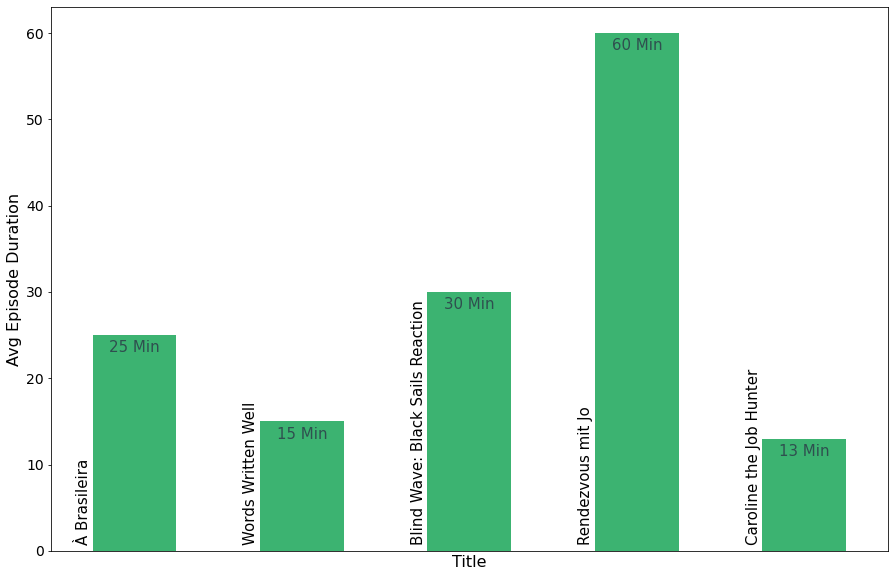

In [0]:
ax = df.plot(x='originalTitle',y='runtimeMinutes',
             figsize=(15,10),kind='bar',color='mediumseagreen',legend=False,fontsize=14)
ax.tick_params(labelbottom=False,bottom=False)
ax.set_xlabel('Title',fontsize=16)
ax.set_ylabel('Avg Episode Duration',fontsize=16)
ind = 0
for i in ax.patches:
  height = i.get_height()
  ax.annotate(s = str(height) + ' Min',xy=(i.get_x()+0.1,height-2),fontsize=15,color='aliceblue')
  ax.annotate(s = df.originalTitle[ind],xy=(i.get_x()-0.1,1),fontsize=15,rotation=90)
  ind = ind+1


In [0]:
# ax = df.plot(x='originalTitle',y='runtimeMinutes',kind='barh',figsize=(15,8),legend=None,color="darkcyan",fontsize=14)
# ax.set_xlabel('Avg Episode Duration',fontsize=16)
# ax.set_ylabel('Title',fontsize=16)

# for rects in ax.patches:
#       ax.annotate(str(rects.get_width())+' Minutes',xy=(rects.get_width()-len(str(rects.get_width())+' Minutes'),
#                                                         rects.get_y()+0.2),fontsize=15)



## Number of seasons of Best TV shows.

In [0]:
import gzip
import pandas as pd
with gzip.open('/content/drive/My Drive/Data/episode.tsv.gz') as f:
  episodes = pd.read_csv(f,sep='\t')
with gzip.open('/content/drive/My Drive/Data/ratings.tsv.gz') as f:
  ratings = pd.read_csv(f,sep='\t')


* the top_shows table from frevious question is merged with episodes table which has seasonNumber.
* table obtained above is grouped by titleId and max
* rows whose data is not available are dropped to get following

In [0]:
episodes

,tconst,parentTconst,seasonNumber,episodeNumber
0,tt0041951,tt0041038,1,9
1,tt0042816,tt0989125,1,17
2,tt0042889,tt0989125,\N,\N
3,tt0043426,tt0040051,3,42
4,tt0043631,tt0989125,2,16
...,...,...,...,...
4768792,tt9916846,tt1289683,3,18
4768793,tt9916848,tt1289683,3,17
4768794,tt9916850,tt1289683,3,19
4768795,tt9916852,tt1289683,3,20


In [0]:
# creating a dataframe of top rating titles
top_rating = ratings[ratings['averageRating'] == 10.0].sort_values(by='numVotes',ascending=False)
top_rating.head()

,tconst,averageRating,numVotes
671254,tt2301451,10.0,112607
867391,tt5658362,10.0,199
460174,tt10867894,10.0,175
454487,tt1069840,10.0,162
568217,tt1576808,10.0,161


In [0]:
top_shows = pd.merge(episodes[['parentTconst','seasonNumber']],top_rating[['tconst']],left_on='parentTconst',right_on='tconst')
top_shows = top_shows.drop('tconst',axis=1)
n_seasons = top_shows.loc[top_shows.seasonNumber != '\\N'].groupby(by='parentTconst').max()
n_seasons

,seasonNumber
parentTconst,
tt10233774,1
tt10243828,6
tt10276912,1
tt10293068,2
tt10361854,1
tt10622458,5
tt10758248,1
tt11004858,4
tt11466824,1


In [0]:
top_shows.drop(['tconst_x','tconst_y','averageRating','episodeNumber','numVotes'],axis=1,inplace=True)

In [0]:
top_shows.tail(20)

,parentTconst,seasonNumber
148,tt2360408,1
149,tt2360408,1
150,tt2360408,1
151,tt5190996,1
152,tt5190996,1
153,tt5190996,1
154,tt5190996,1
155,tt5190996,1
156,tt5190996,1
157,tt5190996,1


In [0]:
top_shows = top_shows.groupby('parentTconst').max()

In [0]:
top_shows

,seasonNumber
parentTconst,
tt10233774,1
tt10243828,6
tt10276912,1
tt10293068,2
tt10361854,1
tt10622458,5
tt10758248,1
tt11004858,4
tt11466824,1


In [0]:
len(top_shows)

16

In [0]:
with gzip.open('/content/drive/My Drive/Data/genres.tsv.gz') as f:
  genres = pd.read_csv(f,sep='\t')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
genres

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"
...,...,...,...,...,...,...,...,...,...
6710056,tt9916848,tvEpisode,Episode #3.17,Episode #3.17,0,2010,\N,\N,"Action,Drama,Family"
6710057,tt9916850,tvEpisode,Episode #3.19,Episode #3.19,0,2010,\N,\N,"Action,Drama,Family"
6710058,tt9916852,tvEpisode,Episode #3.20,Episode #3.20,0,2010,\N,\N,"Action,Drama,Family"
6710059,tt9916856,short,The Wind,The Wind,0,2015,\N,27,Short


In [0]:
top_shows = pd.merge(genres,top_shows,left_on='tconst',right_on='parentTconst')

In [0]:
top_shows

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,seasonNumber
0,tt10233774,tvSeries,Rusty Camel,Rusty Camel,0,2020,\N,\N,Comedy,1
1,tt10243828,tvSeries,Live from the 8th Dimension,Live from the 8th Dimension,0,2019,\N,\N,Comedy,6
2,tt10276912,tvMiniSeries,"That's My Chair, That Is","That's My Chair, That Is",0,2019,\N,9,Comedy,1
3,tt10293068,tvSeries,À Brasileira,À Brasileira,0,2019,\N,25,Documentary,2
4,tt10361854,tvSeries,Tunadas,Tunadas,0,2019,\N,\N,Documentary,1
5,tt10622458,tvSeries,Words Written Well,Words Written Well,0,2019,\N,15,Short,5
6,tt10758248,tvMiniSeries,FSE Moments (Frustrated Software Engineer Mome...,FSE Moments (Frustrated Software Engineer Mome...,0,2016,\N,\N,Comedy,1
7,tt11004858,tvSeries,Blind Wave: Black Sails Reaction,Blind Wave: Black Sails Reaction,0,2018,2018,30,Talk-Show,4
8,tt11466824,tvMiniSeries,State of Decay,State of Decay,0,2019,2020,9,Comedy,1
9,tt1165334,tvSeries,Rendezvous mit Jo,Rendezvous mit Jo,0,1963,1965,60,"Music,Talk-Show",\N


In [0]:
top_seasons = pd.DataFrame({'title_Id':top_shows.tconst,
                            'title':top_shows.originalTitle,
                            'Number of seasons':top_shows.seasonNumber})
top_seasons = top_seasons.loc[top_seasons['Number of seasons'] != '\\N'].reset_index(drop=True)
top_seasons

,title_Id,title,Number of seasons
0,tt10233774,Rusty Camel,1
1,tt10243828,Live from the 8th Dimension,6
2,tt10276912,"That's My Chair, That Is",1
3,tt10293068,À Brasileira,2
4,tt10361854,Tunadas,1
5,tt10622458,Words Written Well,5
6,tt10758248,FSE Moments (Frustrated Software Engineer Mome...,1
7,tt11004858,Blind Wave: Black Sails Reaction,4
8,tt11466824,State of Decay,1
9,tt11863100,Boss Hoggin Road Trip Series,1


## Year in which maximum tv shows ended

In [0]:
import gzip
import pandas as pd
with gzip.open('/content/drive/My Drive/Data/genres.tsv.gz') as f:
  genres = pd.read_csv(f,sep='\t')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
genres

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"
...,...,...,...,...,...,...,...,...,...
6710056,tt9916848,tvEpisode,Episode #3.17,Episode #3.17,0,2010,\N,\N,"Action,Drama,Family"
6710057,tt9916850,tvEpisode,Episode #3.19,Episode #3.19,0,2010,\N,\N,"Action,Drama,Family"
6710058,tt9916852,tvEpisode,Episode #3.20,Episode #3.20,0,2010,\N,\N,"Action,Drama,Family"
6710059,tt9916856,short,The Wind,The Wind,0,2015,\N,27,Short


In [0]:
tv_shows = genres.loc[genres.titleType == 'tvSeries'].loc[genres.endYear != '\\N']
tv_shows.endYear = tv_shows.endYear.astype(int)
tv_shows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48856 entries, 34987 to 6709753
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tconst          48856 non-null  object
 1   titleType       48856 non-null  object
 2   primaryTitle    48856 non-null  object
 3   originalTitle   48856 non-null  object
 4   isAdult         48856 non-null  int64 
 5   startYear       48856 non-null  object
 6   endYear         48856 non-null  int64 
 7   runtimeMinutes  48856 non-null  object
 8   genres          48856 non-null  object
dtypes: int64(2), object(7)
memory usage: 3.7+ MB


In [0]:
tv_shows

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
34987,tt0035599,tvSeries,Voice of Firestone Televues,Voice of Firestone Televues,0,1943,1947,15,\N
35188,tt0035803,tvSeries,The German Weekly Review,Die Deutsche Wochenschau,0,1940,1945,12,Documentary
37617,tt0038276,tvSeries,You Are an Artist,You Are an Artist,0,1946,1950,15,\N
38451,tt0039120,tvSeries,Americana,Americana,0,1947,1949,30,"Family,Game-Show"
38452,tt0039121,tvSeries,Birthday Party,Birthday Party,0,1947,1949,30,Family
...,...,...,...,...,...,...,...,...,...
6709347,tt9915338,tvSeries,Aunty Donna: Camp Bush Camp!,Aunty Donna: Camp Bush Camp!,0,2018,2018,5,Comedy
6709441,tt9915530,tvSeries,The Land F.A.U.,The Land F.A.U.,0,2019,2019,\N,Crime
6709570,tt9915822,tvSeries,Ichhapyaari Naagin,Ichhapyaari Naagin,0,2016,2017,20,Fantasy
6709752,tt9916216,tvSeries,Kalyanam Mudhal Kadhal Varai,Kalyanam Mudhal Kadhal Varai,0,2014,2017,22,Romance


In [0]:
year = tv_shows.groupby('endYear').count()

In [0]:
year

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres
endYear,,,,,,,,
1924,1,1,1,1,1,1,1,1
1932,11,11,11,11,11,11,11,11
1933,2,2,2,2,2,2,2,2
1935,1,1,1,1,1,1,1,1
1936,3,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...
2022,1,1,1,1,1,1,1,1
2023,1,1,1,1,1,1,1,1
2025,1,1,1,1,1,1,1,1


In [0]:
year.reset_index(inplace=True)

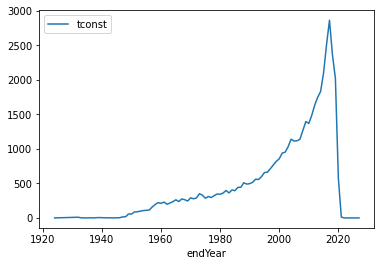

In [0]:
year.plot(x='endYear',y='tconst')

In [0]:
year

,endYear,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres
0,1924,1,1,1,1,1,1,1,1
1,1932,11,11,11,11,11,11,11,11
2,1933,2,2,2,2,2,2,2,2
3,1935,1,1,1,1,1,1,1,1
4,1936,3,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...
88,2022,1,1,1,1,1,1,1,1
89,2023,1,1,1,1,1,1,1,1
90,2025,1,1,1,1,1,1,1,1
91,2026,1,1,1,1,1,1,1,1


In [0]:
x = year.tconst
x

83    2863
Name: tconst, dtype: int64

In [0]:
max_x

2017

Text(0, 0.5, 'Number of Shows Ended')

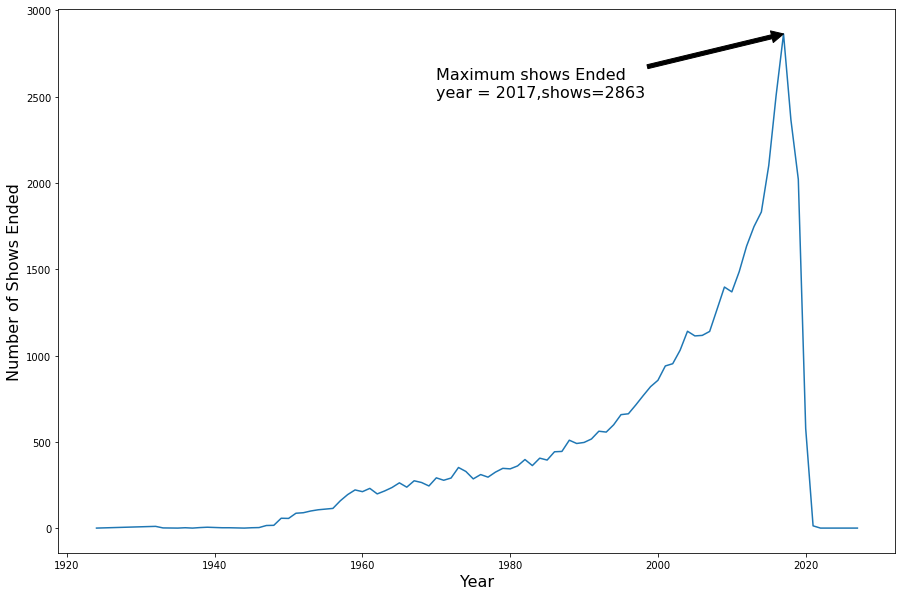

In [0]:
fig,ax=plt.subplots(figsize=(15,10))
ax.plot(year.endYear,year.tconst)
max_x = int(year.endYear[year.tconst== year.tconst.max()])
max_y = year.tconst.max()
ax.annotate(f'Maximum shows Ended\nyear = {max_x },shows={max_y}',
            xy=(max_x,max_y),xytext=(1970,2500),arrowprops=dict(facecolor='black'),
            fontsize=16)
ax.set_xlabel('Year',fontsize=16)
ax.set_ylabel('Number of Shows Ended',fontsize=16)

In [0]:

year.sort_values('tconst',ascending=False)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres
endYear,,,,,,,,
2017,2863,2863,2863,2863,2863,2863,2863,2863
2016,2508,2508,2508,2508,2508,2508,2508,2508
2018,2365,2365,2365,2365,2365,2365,2365,2365
2015,2101,2101,2101,2101,2101,2101,2101,2101
2019,2021,2021,2021,2021,2021,2021,2021,2021
...,...,...,...,...,...,...,...,...
1924,1,1,1,1,1,1,1,1
1944,1,1,1,1,1,1,1,1
1937,1,1,1,1,1,1,1,1


In [0]:
year.loc[year.tconst == max(year.tconst)]

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres
endYear,,,,,,,,
2017,2863,2863,2863,2863,2863,2863,2863,2863


## Factors for higher rating

In [0]:
import gzip
import pandas as pd

with gzip.open('/content/drive/My Drive/Data/ratings.tsv.gz') as f:
  ratings = pd.read_csv(f,sep='\t')
with gzip.open('/content/drive/My Drive/Data/title.tsv.gz') as f:
  title = pd.read_csv(f,sep='\t')
with gzip.open('/content/drive/My Drive/Data/genres.tsv.gz') as f:
  genres = pd.read_csv(f,sep='\t')
with gzip.open('/content/drive/My Drive/Data/crew.tsv.gz') as f:
  crew = pd.read_csv(f,sep='\t')
with gzip.open('/content/drive/My Drive/Data/director.tsv.gz') as f:
  director = pd.read_csv(f,sep='\t')
with gzip.open('/content/drive/My Drive/Data/episode.tsv.gz') as f:
  episode = pd.read_csv(f,sep='\t')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


* ratings :done
* title :
* genres : done
* crew :
* episode : done

In [0]:
ratings

,tconst,averageRating,numVotes
0,tt0000001,5.6,1600
1,tt0000002,6.0,196
2,tt0000003,6.5,1275
3,tt0000004,6.1,121
4,tt0000005,6.1,2038
...,...,...,...
1024879,tt9916576,6.0,9
1024880,tt9916578,8.4,17
1024881,tt9916720,5.5,48
1024882,tt9916766,6.8,13


In [0]:
genres

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"
...,...,...,...,...,...,...,...,...,...
6710056,tt9916848,tvEpisode,Episode #3.17,Episode #3.17,0,2010,\N,\N,"Action,Drama,Family"
6710057,tt9916850,tvEpisode,Episode #3.19,Episode #3.19,0,2010,\N,\N,"Action,Drama,Family"
6710058,tt9916852,tvEpisode,Episode #3.20,Episode #3.20,0,2010,\N,\N,"Action,Drama,Family"
6710059,tt9916856,short,The Wind,The Wind,0,2015,\N,27,Short


out of 6710061 unique titles from genres table 1024884 unique titles in rating are there

In [0]:
g = genres.drop(['primaryTitle','originalTitle'],axis=1)
g

,tconst,titleType,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,0,1893,\N,1,"Comedy,Short"
...,...,...,...,...,...,...,...
6710056,tt9916848,tvEpisode,0,2010,\N,\N,"Action,Drama,Family"
6710057,tt9916850,tvEpisode,0,2010,\N,\N,"Action,Drama,Family"
6710058,tt9916852,tvEpisode,0,2010,\N,\N,"Action,Drama,Family"
6710059,tt9916856,short,0,2015,\N,27,Short


In [0]:
df = pd.merge(g,ratings)
df

,tconst,titleType,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,short,0,1894,\N,1,"Documentary,Short",5.6,1600
1,tt0000002,short,0,1892,\N,5,"Animation,Short",6.0,196
2,tt0000003,short,0,1892,\N,4,"Animation,Comedy,Romance",6.5,1275
3,tt0000004,short,0,1892,\N,12,"Animation,Short",6.1,121
4,tt0000005,short,0,1893,\N,1,"Comedy,Short",6.1,2038
...,...,...,...,...,...,...,...,...,...
1024879,tt9916576,tvEpisode,0,2019,\N,85,Reality-TV,6.0,9
1024880,tt9916578,tvEpisode,0,2019,\N,\N,"Adventure,Biography,Comedy",8.4,17
1024881,tt9916720,short,0,2019,\N,10,"Comedy,Horror,Mystery",5.5,48
1024882,tt9916766,tvEpisode,0,2019,\N,43,"Family,Reality-TV",6.8,13


In [0]:
df.replace('\\N', np.nan,inplace=True)
df

,tconst,titleType,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,short,0,1894,NaN,1,"Documentary,Short",5.6,1600
1,tt0000002,short,0,1892,NaN,5,"Animation,Short",6.0,196
2,tt0000003,short,0,1892,NaN,4,"Animation,Comedy,Romance",6.5,1275
3,tt0000004,short,0,1892,NaN,12,"Animation,Short",6.1,121
4,tt0000005,short,0,1893,NaN,1,"Comedy,Short",6.1,2038
...,...,...,...,...,...,...,...,...,...
1024879,tt9916576,tvEpisode,0,2019,NaN,85,Reality-TV,6.0,9
1024880,tt9916578,tvEpisode,0,2019,NaN,NaN,"Adventure,Biography,Comedy",8.4,17
1024881,tt9916720,short,0,2019,NaN,10,"Comedy,Horror,Mystery",5.5,48
1024882,tt9916766,tvEpisode,0,2019,NaN,43,"Family,Reality-TV",6.8,13


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1024884 entries, 0 to 1024883
Data columns (total 9 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   tconst          1024884 non-null  object 
 1   titleType       1024884 non-null  object 
 2   isAdult         1024884 non-null  int64  
 3   startYear       1024753 non-null  object 
 4   endYear         23130 non-null    object 
 5   runtimeMinutes  748918 non-null   object 
 6   genres          1004372 non-null  object 
 7   averageRating   1024884 non-null  float64
 8   numVotes        1024884 non-null  int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 78.2+ MB


In [0]:
df - df[df.runtimeMinutes.isin(['Talk-Show','Reality-TV']) == True]

TypeError: ignored

In [0]:
df.loc[df.runtimeMinutes == 'Reality-TV']

,tconst,titleType,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
779847,tt3984412,tvEpisode,2014,NaN,NaN,Reality-TV,NaN,8.0,5


In [0]:
tmp = df.dropna(subset=['runtimeMinutes'])
tmp.runtimeMinutes.astype(int)

ValueError: ignored

In [0]:
np.array(df.runtimeMinutes.unique())

array(['1', '5', '4', '12', '45', '2', nan, '0', '3', '20', '13', '6',
       '11', '10', '8', '15', '21', '16', '14', '7', '24', '100', '9',
       '17', '70', '25', '120', '38', '58', '50', '19', '44', '23', '18',
       '51', '40', '28', '60', '56', '53', '30', '26', '41', '48', '68',
       '34', '33', '31', '29', '43', '46', '27', '32', '85', '55', '121',
       '69', '22', '54', '90', '35', '150', '64', '96', '49', '61', '300',
       '99', '110', '39', '88', '52', '86', '72', '78', '75', '450',
       '148', '37', '59', '63', '112', '1428', '84', '65', '42', '105',
       '310', '73', '81', '199', '109', '74', '80', '82', '67', '195',
       '440', '77', '62', '71', '57', '47', '36', '421', '360', '180',
       '163', '93', '400', '95', '83', '116', '66', '125', '97', '138',
       '350', '374', '91', '87', '108', '136', '94', '117', '92', '76',
       '418', '330', '223', '489', '119', '122', '115', '207', '166',
       '106', '111', '145', '167', '103', '130', '157', '104', '1

In [0]:
df

,tconst,titleType,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,short,0,1894,NaN,1,"Documentary,Short",5.6,1600
1,tt0000002,short,0,1892,NaN,5,"Animation,Short",6.0,196
2,tt0000003,short,0,1892,NaN,4,"Animation,Comedy,Romance",6.5,1275
3,tt0000004,short,0,1892,NaN,12,"Animation,Short",6.1,121
4,tt0000005,short,0,1893,NaN,1,"Comedy,Short",6.1,2038
...,...,...,...,...,...,...,...,...,...
1024879,tt9916576,tvEpisode,0,2019,NaN,85,Reality-TV,6.0,9
1024880,tt9916578,tvEpisode,0,2019,NaN,NaN,"Adventure,Biography,Comedy",8.4,17
1024881,tt9916720,short,0,2019,NaN,10,"Comedy,Horror,Mystery",5.5,48
1024882,tt9916766,tvEpisode,0,2019,NaN,43,"Family,Reality-TV",6.8,13


In [0]:
df.fillna('runtimeMinutes').median()

isAdult           0.0
averageRating     7.1
numVotes         20.0
dtype: float64

In [0]:
df1 = df.drop('endYear',1)
df1 = df1.loc[df1.runtimeMinutes != '\\N']
df1

,tconst,titleType,isAdult,startYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,short,0,1894,1,"Documentary,Short",5.6,1600
1,tt0000002,short,0,1892,5,"Animation,Short",6.0,196
2,tt0000003,short,0,1892,4,"Animation,Comedy,Romance",6.5,1275
3,tt0000004,short,0,1892,12,"Animation,Short",6.1,121
4,tt0000005,short,0,1893,1,"Comedy,Short",6.1,2038
...,...,...,...,...,...,...,...,...
1024877,tt9916538,movie,0,2019,123,Drama,8.4,5
1024878,tt9916544,short,0,2019,12,"Drama,Short",7.2,19
1024879,tt9916576,tvEpisode,0,2019,85,Reality-TV,6.0,9
1024881,tt9916720,short,0,2019,10,"Comedy,Horror,Mystery",5.5,48


In [0]:
(1024884-748918)/1024884

0.26926559493562197

In [0]:
episode

,tconst,parentTconst,seasonNumber,episodeNumber
0,tt0041951,tt0041038,1,9
1,tt0042816,tt0989125,1,17
2,tt0042889,tt0989125,\N,\N
3,tt0043426,tt0040051,3,42
4,tt0043631,tt0989125,2,16
...,...,...,...,...
4768792,tt9916846,tt1289683,3,18
4768793,tt9916848,tt1289683,3,17
4768794,tt9916850,tt1289683,3,19
4768795,tt9916852,tt1289683,3,20


In [0]:
len(episode.tconst.unique())

4768797

merge df and episode table in a way all of df data is present and column from episode are added whereever applicable (left outer join)

In [0]:
df1 = pd.merge(df,episode,how='left')
df1

NameError: ignored

In [0]:
director

,tconst,directors,writers
0,tt0000001,nm0005690,\N
1,tt0000002,nm0721526,\N
2,tt0000003,nm0721526,\N
3,tt0000004,nm0721526,\N
4,tt0000005,nm0005690,\N
...,...,...,...
6710056,tt9916848,"nm5519454,nm5519375","nm6182221,nm1628284,nm2921377"
6710057,tt9916850,"nm5519454,nm5519375","nm6182221,nm1628284,nm2921377"
6710058,tt9916852,"nm5519375,nm5519454","nm6182221,nm1628284,nm2921377"
6710059,tt9916856,nm10538645,nm6951431


In [0]:
df2 = pd.merge(df1,director,on='tconst')
df2

NameError: ignored

In [0]:
len(df2.genres.str.split(',')[2])

3

In [0]:
num_of_directors = []
for i,rows in df2.iterrows():
  num_of_directors.append(len(df2.directors.str.split(',')[i]))
num_of_directors

In [0]:
import numpy as np

In [0]:
x = list(crew.category.unique())

In [0]:
y = [pd.Series(np.ones(len(df1)))] * len(x)


In [0]:
pd.DataFrame(dict(zip(x,y)),columns=x)

,self,director,cinematographer,composer,producer,editor,actor,actress,writer,production_designer,archive_footage,archive_sound
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1024879,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1024880,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1024881,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1024882,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [0]:
x

['self',
 'director',
 'cinematographer',
 'composer',
 'producer',
 'editor',
 'actor',
 'actress',
 'writer',
 'production_designer',
 'archive_footage',
 'archive_sound']

In [0]:
crew

,tconst,ordering,nconst,category,job,characters
0,tt0000001,1,nm1588970,self,\N,"[""Self""]"
1,tt0000001,2,nm0005690,director,\N,\N
2,tt0000001,3,nm0374658,cinematographer,director of photography,\N
3,tt0000002,1,nm0721526,director,\N,\N
4,tt0000002,2,nm1335271,composer,\N,\N
...,...,...,...,...,...,...
38728844,tt9916880,5,nm0996406,director,principal director,\N
38728845,tt9916880,6,nm1482639,writer,\N,\N
38728846,tt9916880,7,nm2586970,writer,books,\N
38728847,tt9916880,8,nm1594058,producer,producer,\N


In [0]:
len(director.tconst.unique())

6710061

In [0]:
title

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Карменсіта,UA,\N,imdbDisplay,\N,0
1,tt0000001,2,Carmencita,DE,\N,\N,literal title,0
2,tt0000001,3,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0
3,tt0000001,4,Καρμενσίτα,GR,\N,imdbDisplay,\N,0
4,tt0000001,5,Карменсита,RU,\N,imdbDisplay,\N,0
...,...,...,...,...,...,...,...,...
21226843,tt9916852,4,エピソード #3.20,JP,ja,\N,\N,0
21226844,tt9916852,5,Episódio #3.20,PT,pt,\N,\N,0
21226845,tt9916852,6,Episodio #3.20,IT,it,\N,\N,0
21226846,tt9916852,7,एपिसोड #3.20,IN,hi,\N,\N,0


In [0]:
t= title.drop(['ordering','title','types','attributes','isOriginalTitle'],axis=1)
t

,titleId,region,language
0,tt0000001,UA,\N
1,tt0000001,DE,\N
2,tt0000001,HU,\N
3,tt0000001,GR,\N
4,tt0000001,RU,\N
...,...,...,...
21226843,tt9916852,JP,ja
21226844,tt9916852,PT,pt
21226845,tt9916852,IT,it
21226846,tt9916852,IN,hi


In [0]:
g = genres.drop(['primaryTitle','originalTitle'],axis=1)
g

,tconst,titleType,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,0,1893,\N,1,"Comedy,Short"
...,...,...,...,...,...,...,...
6710056,tt9916848,tvEpisode,0,2010,\N,\N,"Action,Drama,Family"
6710057,tt9916850,tvEpisode,0,2010,\N,\N,"Action,Drama,Family"
6710058,tt9916852,tvEpisode,0,2010,\N,\N,"Action,Drama,Family"
6710059,tt9916856,short,0,2015,\N,27,Short


In [0]:
len(genres.tconst.unique()),len(genres)

(6710061, 6710061)

In [0]:
df

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.6,1600
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",6.0,196
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance",6.5,1275
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short",6.1,121
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short",6.1,2038
...,...,...,...,...,...,...,...,...,...,...,...
1024879,tt9916576,tvEpisode,Destinee's Story,Destinee's Story,0,2019,\N,85,Reality-TV,6.0,9
1024880,tt9916578,tvEpisode,The Trial of Joan Collins,The Trial of Joan Collins,0,2019,\N,\N,"Adventure,Biography,Comedy",8.4,17
1024881,tt9916720,short,The Nun 2,The Nun 2,0,2019,\N,10,"Comedy,Horror,Mystery",5.5,48
1024882,tt9916766,tvEpisode,Episode #10.15,Episode #10.15,0,2019,\N,43,"Family,Reality-TV",6.8,13
